<a href="https://colab.research.google.com/github/semicolon123/Customer-churn/blob/main/Bank_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

Data is taken from kaggle at url:
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

# Understanding the dataset

In [ ]:
df = pd.read_csv('/content/sample_data/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
for column in df:
                print(f'{column}: {df[column].unique()}')

RowNumber: [    1     2     3 ...  9998  9999 10000]
CustomerId: [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname: ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 7

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.drop('RowNumber',axis="columns",inplace=True)

In [ ]:
df.drop('CustomerId',axis="columns",inplace=True)

In [ ]:
df.drop('Surname',axis="columns",inplace=True)

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df.shape

(10000, 13)

In [ ]:
for column in df:
                print(f'{column}: {df[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

# Data Manipulation and normalization

In [ ]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)    #Male is 0 and female is 1

In [ ]:
df.dtypes

CreditScore          int64
Geography           object
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
df[df.Age.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.CreditScore.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.Geography.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.Gender.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.Tenure.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.Balance.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.NumOfProducts.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.HasCrCard.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.IsActiveMember.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.EstimatedSalary.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df[df.Exited.isnull()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.shape

(10000, 11)

There is no null value in the entire dataset as of now!

In [ ]:
for column in df:
                print(f'{column}: {df[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

Convert Geography: ['France' 'Spain' 'Germany'] to numeric value by using one hot encoding (OHE)..

Before doing so, let's see if Geography has an impact on person exiting the service. 

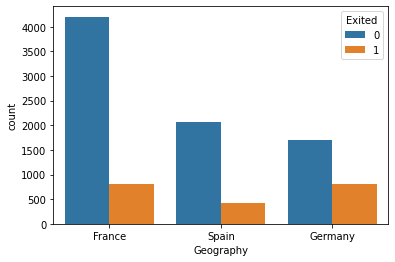

In [ ]:
import seaborn as sns 
fig, axes = plt.subplots()
sns.countplot(x="Geography", hue="Exited", data=df)

In [ ]:
france_not_exited = df[df.Geography=='France']

In [ ]:
france_not_exited_ne = france_not_exited[france_not_exited.Exited==1]

In [ ]:
france_not_exited_ne

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
35,475,France,1,45,0,134264.04,1,1,0,27822.99,1
41,465,France,1,51,8,122522.32,1,0,0,181297.65,1
43,834,France,1,49,2,131394.56,1,0,0,194365.76,1
...,...,...,...,...,...,...,...,...,...,...,...
9920,678,France,1,49,3,204510.94,1,0,1,738.88,1
9947,615,France,0,34,1,83503.11,2,1,1,73124.53,1
9956,520,France,1,46,10,85216.61,1,1,0,117369.52,1
9991,597,France,1,53,4,88381.21,1,1,0,69384.71,1


The above graph shows that Geography is also important to predict future exits. Hence I am not dropping this attribute.

Let's do One hot encoding to convert this attribute to numerical data.

In [ ]:
df1 = pd.get_dummies(data=df, columns=['Geography'])   #New dataframe with hot encoded attributes
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [ ]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [ ]:
for column in df1:
                print(f'{column}: {df1[column].unique()}')

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [ ]:
col_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [ ]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,1,0,0
9996,0.332,0,0.229730,1.0,0.228657,0.000000,1,1,0.508490,0,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,1,0,0
9998,0.844,0,0.324324,0.3,0.299226,0.333333,1,0,0.464429,1,0,1,0


In [ ]:
for column in df1:
                print(f'{column}: {df1[column].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

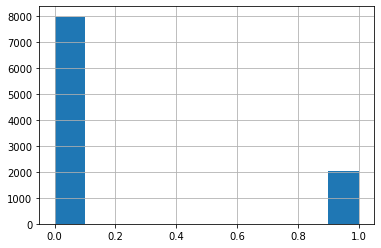

In [ ]:
df1['Exited'].hist()

In [ ]:
Exited_yes = df1[df1.Exited==1]
Exited_yes.shape

(2037, 13)

In [ ]:
Exited_no = df1[df1.Exited==0]
Exited_no.shape

(7963, 13)

In [ ]:
7963+2037

10000

The above graph shows that the data is NOT balanced. It has 2037 rows with exited = 1 (People who left) and 7963 rows with exited = 0 (people who didn't leave).

For a good model, these two values should be comparable/balanced.

I am not doing anything about this data right now. I will continue building the model, but in real life, these cases are very critical and should be taken care by adding more data in less side (add more data for people who left since that data is very less).

# **Train test split**

In [ ]:
X = df1.drop('Exited',axis="columns")
y = df1['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [ ]:
X_train.shape

(8000, 12)

In [ ]:
X_test.shape

(2000, 12)

In [ ]:
X_test[:5]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7054,0.838,0,0.270270,0.6,0.000000,0.333333,0,0,0.521961,0,0,1
442,0.368,1,0.216216,0.7,0.484466,0.333333,1,1,0.350871,1,0,0
3954,0.758,1,0.216216,0.9,0.526595,0.000000,0,1,0.527039,1,0,0
2288,0.538,1,0.162162,0.7,0.281904,0.000000,1,1,0.804763,1,0,0
3196,0.520,0,0.243243,0.4,0.515908,0.333333,1,0,0.513183,1,0,0


In [ ]:
len(X_train.columns)     #Number of inputs to the neural network!!

12

# **ANN**

In [ ]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(12,), activation='relu'),      #12 because number of inputs is 12
    keras.layers.Dense(6, activation='relu'),                           # hidden
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 980us/step - loss: 0.6203 - accuracy: 0.6938
Epoch 2/100
250/250 [==============================] - 0s 995us/step - loss: 0.4923 - accuracy: 0.8005
Epoch 3/100
250/250 [==============================] - 0s 983us/step - loss: 0.4884 - accuracy: 0.7954
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4609 - accuracy: 0.8065
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4578 - accuracy: 0.8005
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4531 - accuracy: 0.8010
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4425 - accuracy: 0.8096
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4362 - accuracy: 0.8088
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4303 - accuracy: 0.8107
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4483 - 

# **Visualizing the model**

In [ ]:
!pip3 install ann_visualizer

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp36-none-any.whl size=4169 sha256=e7ea7b7707c377d4c0a05bb4c5e336bf44ab82ac787d5cd84f6862029cebe5a7
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [ ]:
!pip install graphviz

In [ ]:
from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Bank Churn Prediction Neural Network")

# **Predictions and accuracy**

In [ ]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 939us/step - loss: 0.3569 - accuracy: 0.8535


[0.35693201422691345, 0.8535000085830688]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted

array([[0.03573263],
       [0.08270496],
       [0.09396252],
       ...,
       [0.01381493],
       [0.03279138],
       [0.08241788]], dtype=float32)

In [ ]:
y_pred=[]

for i in y_predicted:
  if(i>0.5):
    y_pred.append(1)
  else:
    y_pred.append(0)

y_pred[:10]
    

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [ ]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.73      0.44      0.55       405

    accuracy                           0.85      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

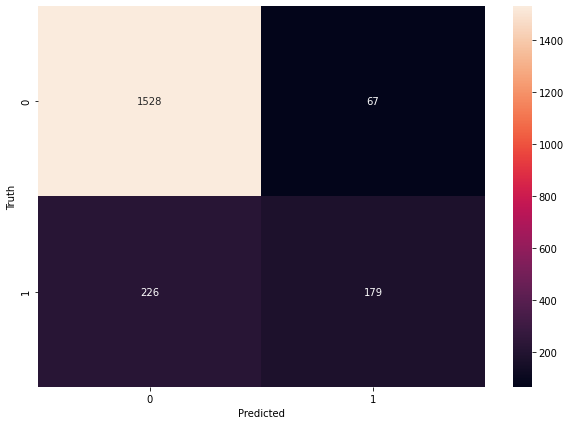

In [ ]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
#Accuracy

(1528+179)/(1528+179+67+226)

0.8535

In [ ]:
print("Precision for class 0:")
1528/(1528+226)



Precision for class 0:


0.87115165336374

In [ ]:
print("Precision for class 1:")
179/(179+67)

Precision for class 1:


0.7276422764227642

In [ ]:
#recall for class 0 
1528/(1528+67)

0.9579937304075236

In [ ]:
#recall for class 1
179/(226+179)

0.4419753086419753

In [ ]:
X_train.head(1)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.8,1,0.283784,0.6,0.0,0.333333,0,0,0.096273,0,0,1


In [ ]:
y_train.head(1)

7751    0
Name: Exited, dtype: int64

In [ ]:
model.predict([[0.8,1,0.283784,0.6,0.0,0.333333,0,0,0.096273,0,0,1]])

array([[0.04867798]], dtype=float32)